In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
from keras.preprocessing import image
from skimage.feature import hog
from scipy import spatial
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.preprocessing.image import load_img
from skimage.measure import label
from sklearn.cluster import KMeans

In [3]:
all_files = glob.glob('./Animals/*/*.jpg')

C:\Users\SHIBASAN\AppData\Local\Programs\Python\Python39\lib\site-packages\skimage\_shared\utils.py:338: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0.Please use `channel_axis` instead.
  return func(*args, **kwargs)


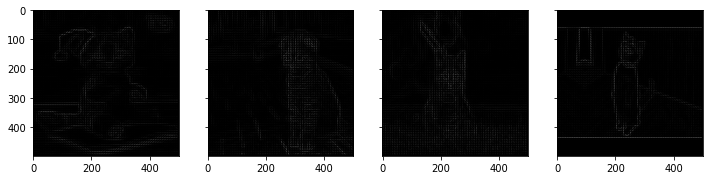

In [4]:
hog1 = cv2.GaussianBlur(cv2.resize(cv2.imread(all_files[0]), (500, 500)), (5, 5), 0)
hog2 = cv2.GaussianBlur(cv2.resize(cv2.imread(all_files[1]), (500, 500)), (5, 5), 0)
hog3 = cv2.GaussianBlur(cv2.resize(cv2.imread(all_files[2]), (500, 500)), (5, 5), 0)
hog4 = cv2.GaussianBlur(cv2.resize(cv2.imread(all_files[3]), (500, 500)), (5, 5), 0)
fd, hog_image1 = hog(hog1, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True, multichannel=True)
fd, hog_image2 = hog(hog2, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True, multichannel=True)
fd, hog_image3 = hog(hog3, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True, multichannel=True)
fd, hog_image4 = hog(hog4, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True, multichannel=True)
plot, ax = plt.subplots(1, 4, figsize=(12, 4), sharey=True, sharex=True)
ax[0].imshow(hog_image1, cmap=plt.cm.gray)
ax[1].imshow(hog_image2, cmap=plt.cm.gray)
ax[2].imshow(hog_image3, cmap=plt.cm.gray)
ax[3].imshow(hog_image4, cmap=plt.cm.gray)
plt.show()

In [5]:
img = cv2.imread(all_files[1])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [6]:
def hog_feature(img,Block_size):
    Stride = (10, 10)
    h, w, c = img.shape
    tile_size = [50,50]
    posRow = np.arange(0, h-Block_size[0]+1, Stride[0])
    posCol = np.arange(0, w-tile_size[1]+1, Stride[1])
    sub_img = []
    for i in posRow:
        for j in posCol:
            sub_img_pre = img[i:i+Block_size[0], j:j+tile_size[1], :]
            blur = cv2.GaussianBlur(sub_img_pre, (5, 5), 0)
            fd, hog_image = hog(blur, orientations=9, pixels_per_cell=(4, 4),cells_per_block=(2, 2), visualize=True, multichannel=True)
            sub_img.append(fd)
    return sub_img

In [7]:
hog_feature1 = hog_feature(img,(40, 20))
hog_feature2 = hog_feature(img,(60, 20))
hog_feature3 = hog_feature(img,(40, 30))

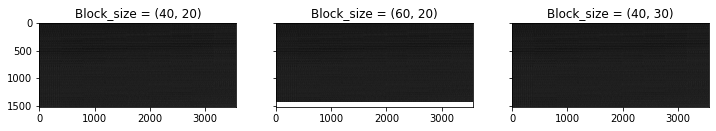

In [8]:
plot, ax = plt.subplots(1, 3, figsize=(12, 4), sharey=True, sharex=True)
ax[0].imshow(hog_feature1, cmap=plt.cm.gray)
ax[0].set_title('Block_size = (40, 20)')
ax[1].imshow(hog_feature2, cmap=plt.cm.gray)
ax[1].set_title('Block_size = (60, 20)')
ax[2].imshow(hog_feature3, cmap=plt.cm.gray)
ax[2].set_title('Block_size = (40, 30)')
plt.show()

In [9]:
Stride = (10, 10)
h, w, c = img.shape
Block_size=(40,20)
tile_size = [50,50]
###for Hog specific only !!!

posRow = np.arange(0, h-Block_size[0]+1, Stride[0])
posCol = np.arange(0, w-tile_size[1]+1, Stride[1])

In [10]:
def clean_feature(feature):
    feature_clean = []
    for i in range(len(feature)):
        if np.isnan(feature[i]).any() == False:
            feature_clean.append(feature[i])
    return feature_clean

In [11]:
hog_feature1_cleaned = clean_feature(hog_feature1)

In [12]:
Kmean = KMeans(n_clusters=2, random_state=0)
cluster = Kmean.fit_predict(hog_feature1_cleaned)

In [13]:
def clusterID_to_grid(cluster):
    grid = cluster.reshape(len(posRow), len(posCol))
    return grid

In [14]:
cluster_array = clusterID_to_grid(cluster)

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 1 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]]


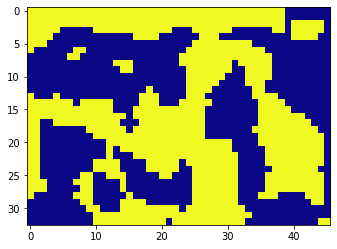

In [15]:
print(cluster_array)
plt.imshow(cluster_array, cmap='plasma')

In [16]:
all_labels = label(cluster_array)
#bounding box

color = (255, 0, 0)
thickness = 1
#ROI

nClass = np.unique(all_labels)

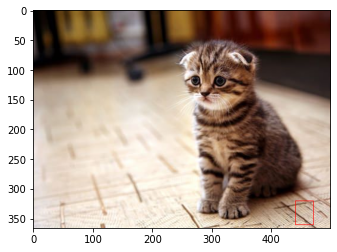

In [17]:
for i in nClass:
   objPos = np.where(all_labels == i)
   startBlockH = objPos[0][0]
   endBlockH =  objPos[0][-1]
   startBlockW =  objPos[1][0]
   endBlockW =  objPos[1][-1]
   startF = posCol[startBlockW], posRow[startBlockH]
   endF =  posCol[endBlockW]+Block_size[1], posRow[endBlockH]+Block_size[0]

ROI_bound = cv2.rectangle(img, startF, endF, color, thickness)
plt.imshow(ROI_bound)